# Aula 02: Criando aplicativos de chat e busca
## Azure OpenAI API Quickstart

## Visão Geral
Este notebook é adaptado do [Repositório de Exemplos do Azure OpenAI](https://github.com/Azure/azure-openai-samples).

A API Python OpenAI também funciona com o Azure OpenAI, com algumas modificações. Saiba mais sobre as diferenças aqui: [Como alternar entre os endpoints OpenAI e Azure OpenAI com Python](https://learn.microsoft.com/azure/ai-services/openai/how-to/switching-endpoints).

Para mais exemplos de início rápido, consulte a [Documentação Oficial de Início Rápido do Azure OpenAI](https://learn.microsoft.com/azure/cognitive-services/openai/quickstart?pivots=programming-language-studio).

## Índice

[Visão Geral](#visão-geral)  
[Introdução ao Serviço Azure OpenAI](#introdução-ao-serviço-azure-openai)  
[Construa seu primeiro prompt](#construa-seu-primeiro-prompt)

[Casos de Uso](#casos-de-uso)  
[1. Resumir Texto](#resumir-texto)  
[2. Classificar Texto](#classificar-texto)  
[3. Gerar Novos Nomes de Produtos](#gerar-novos-nomes-de-produtos)  
[4. Ajuste Fino de um Classificador]()  
[5. Embeddings](#embeddings)

[Referências](#referencias)

### Introdução ao Serviço Azure OpenAI

Novos clientes precisarão [solicitar acesso](https://aka.ms/oai/access) ao Serviço Azure OpenAI.  
Após a aprovação, os clientes podem fazer login no portal do Azure, criar um recurso do Serviço Azure OpenAI e começar a experimentar com os modelos através do estúdio.

[Excelente recurso para começar rapidamente](https://techcommunity.microsoft.com/t5/educator-developer-blog/azure-openai-is-now-generally-available/ba-p/3719177)

### Construa seu primeiro prompt
Este exercício curto fornecerá uma introdução básica para enviar prompts a um modelo OpenAI para uma tarefa simples: "resumir".

**Passos**:  
1. Instale a biblioteca OpenAI no seu ambiente Python  
2. Carregue as bibliotecas auxiliares padrão e defina suas credenciais de segurança típicas para o Serviço OpenAI que você criou  
3. Escolha um modelo para a sua tarefa  
4. Crie um prompt simples para o modelo  
5. Envie sua solicitação para a API do modelo!

### 1. Instalar OpenAI

> [!NOTA] Este passo não é necessário se você estiver executando este notebook no Codespaces ou dentro de um Devcontainer.

In [ ]:
%pip install openai python-dotenv

### 2. Importe as bibliotecas auxiliares e instancie as credenciais

In [ ]:
import os
from openai import AzureOpenAI
import numpy as np
from dotenv import load_dotenv
load_dotenv()

#validar dados do .env file

client = AzureOpenAI(
  api_key=os.environ['AZURE_OPENAI_KEY'],  # isso também é o padrão, pode ser omitido
  api_version = "2023-05-15"
  )

### 3. Encontrando o modelo certo  
Os modelos GPT-3.5-turbo ou GPT-4 podem entender e gerar linguagem natural. O serviço oferece quatro capacidades de modelo, cada uma com diferentes níveis de potência e velocidade, adequadas para diferentes tarefas.

[Modelos Azure OpenAI](https://learn.microsoft.com/azure/cognitive-services/openai/concepts/models)

In [ ]:
# Selecione o modelo curie de Uso Geral para texto.
model = os.environ['AZURE_OPENAI_DEPLOYMENT']

### 4. Design de Prompt

"A mágica dos grandes modelos de linguagem é que, ao serem treinados para minimizar esse erro de previsão em grandes quantidades de texto, os modelos acabam aprendendo conceitos úteis para essas previsões. Por exemplo, eles aprendem conceitos como"(1):

* como soletrar
* como a gramática funciona
* como parafrasear
* como responder perguntas
* como manter uma conversa
* como escrever em muitos idiomas
* como programar
* etc.

#### Como controlar um grande modelo de linguagem  
"De todos os insumos para um grande modelo de linguagem, de longe o mais influente é o prompt de texto"(1).

Os grandes modelos de linguagem podem ser orientados para produzir saída de algumas maneiras:

- **Instrução**: Diga ao modelo o que você quer
- **Conclusão**: Induza o modelo a completar o início do que você quer
- **Demonstração**: Mostre ao modelo o que você quer, com:
  - Alguns exemplos no prompt
  - Centenas ou milhares de exemplos em um conjunto de treinamento para ajuste fino

#### Existem três diretrizes básicas para criar prompts:

**Mostrar e dizer**. Deixe claro o que você quer, seja através de instruções, exemplos ou uma combinação dos dois. Se você quer que o modelo classifique uma lista de itens em ordem alfabética ou que classifique um parágrafo por sentimento, mostre isso para ele.

**Forneça dados de qualidade**. Se você está tentando construir um classificador ou fazer com que o modelo siga um padrão, certifique-se de que há exemplos suficientes. Revise seus exemplos — o modelo geralmente é inteligente o suficiente para ver através de erros ortográficos básicos e lhe dar uma resposta, mas também pode assumir que isso é intencional e isso pode afetar a resposta.

**Verifique suas configurações**. As configurações de temperatura e top_p controlam o quão determinístico o modelo é na geração de uma resposta. Se você está pedindo uma resposta em que só há uma resposta correta, então você deve configurar esses valores mais baixos. Se você está buscando respostas mais diversas, então pode configurá-los mais altos. O erro número um que as pessoas cometem com essas configurações é assumir que elas são controles de "inteligência" ou "criatividade".

Fonte: [GitHub - Azure/OpenAI](https://github.com/Azure/OpenAI/blob/main/How%20to/Completions.md)

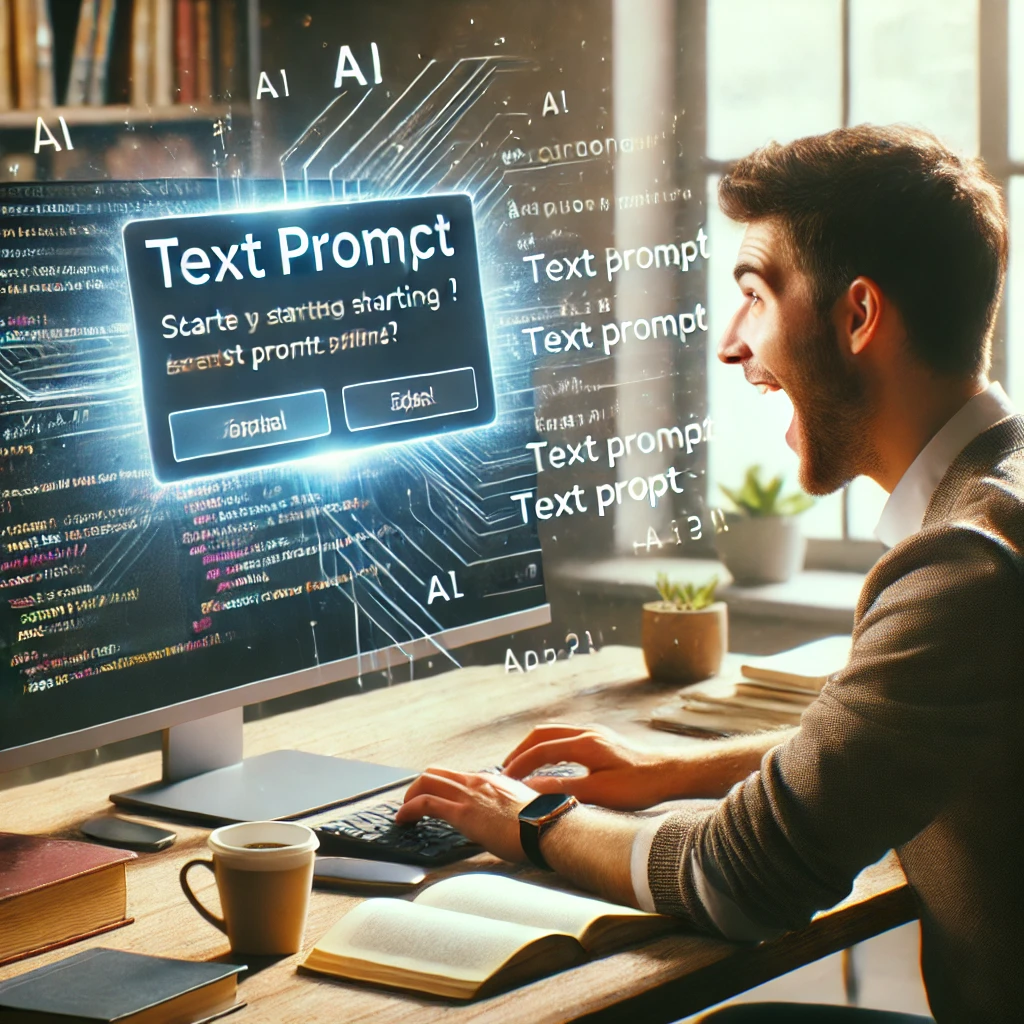

### 5. Submit!

In [ ]:
# Crie seu primeiro prompt
text_prompt = "Quem nasceu primeiro, o ovo ou a galinha?"

response = client.chat.completions.create(
  model=model,
  messages = [{"role":"system", "content":"Você é um assistente eficiente."},
               {"role":"user","content":text_prompt},])

response.choices[0].message.content

### Repita a mesma chamada, como os resultados se comparam?

In [ ]:

response = client.chat.completions.create(
  model=model,
  messages = [{"role":"system", "content":"Você é um assistente eficiente."},
               {"role":"user","content":text_prompt},])

response.choices[0].message.content

## Casos de Uso
### Resumir Texto  
#### Desafio  
Resuma o texto adicionando um 'tl;dr:' ao final de um trecho de texto. Observe como o modelo entende como realizar várias tarefas sem instruções adicionais. Você pode experimentar prompts mais descritivos do que "tl;dr" para modificar o comportamento do modelo e personalizar a sumarização que você recebe(3).

Trabalhos recentes demonstraram ganhos substanciais em muitas tarefas e benchmarks de PLN ao pré-treinar em um grande corpus de texto seguido de ajuste fino em uma tarefa específica. Embora tipicamente agnóstica em termos de arquitetura, esse método ainda requer conjuntos de dados de ajuste fino específicos para cada tarefa, compostos de milhares ou dezenas de milhares de exemplos. Em contraste, os humanos geralmente podem realizar uma nova tarefa de linguagem com apenas alguns exemplos ou com instruções simples – algo com que os sistemas de PLN atuais ainda lutam bastante. Aqui mostramos que ampliar modelos de linguagem melhora significativamente o desempenho em tarefas agnósticas e de poucos exemplos, às vezes até alcançando competitividade com abordagens anteriores de ajuste fino de última geração.

**Tl;dr:** Ampliar modelos de linguagem melhora o desempenho em tarefas de linguagem com poucos exemplos, chegando a competir com métodos de ajuste fino anteriores.

### Exercícios para vários casos de uso  
1. Resumir Texto  
2. Classificar Texto  
3. Gerar Novos Nomes de Produtos  
4. Embeddings  
5. Ajustar Fino de um Classificador

In [ ]:
prompt = "Trabalhos recentes demonstraram ganhos substanciais em muitas tarefas e benchmarks de PLN (Processamento de Linguagem Natural) ao pré-treinar em um grande corpus de texto, seguido de ajuste fino em uma tarefa específica. Embora tipicamente agnóstico em termos de arquitetura, esse método ainda requer conjuntos de dados específicos para o ajuste fino, compostos de milhares ou dezenas de milhares de exemplos. Em contraste, os humanos geralmente conseguem realizar uma nova tarefa de linguagem com apenas alguns exemplos ou instruções simples - algo com que os sistemas de PLN atuais ainda enfrentam grandes dificuldades. Aqui mostramos que aumentar a escala dos modelos de linguagem melhora significativamente o desempenho em tarefas agnósticas e com poucos exemplos, às vezes até alcançando competitividade com abordagens anteriores de ajuste fino de última geração.\n\ntl;dr"


In [ ]:
# Configurando alguns parâmetros adicionais e típicos durante a chamada da API

response = client.chat.completions.create(
  model=model,
  messages = [{"role":"system", "content":"Você é um assistente eficiente."},
               {"role":"user","content":prompt},])

response.choices[0].message.content

## Classificar Texto  
#### Desafio  
Classifique itens em categorias fornecidas no momento da inferência. No exemplo a seguir, fornecemos tanto as categorias quanto o texto a ser classificado no prompt (*referência do playground).

Consulta do Cliente: Olá, uma das teclas do teclado do meu laptop quebrou recentemente e precisarei de uma substituição.

Categoria classificada:

In [ ]:
prompt = "Classifique a seguinte consulta em uma das seguintes categorias: [Preços, Suporte de Hardware, Suporte de Software]\n\nConsulta: Olá, uma das teclas do teclado do meu laptop quebrou recentemente e precisarei de uma substituição:\n\nCategoria classificada:"
print(prompt)

In [ ]:
# Configurando alguns parâmetros adicionais e típicos durante a chamada da API

response = client.chat.completions.create(
  model=model,
  messages = [{"role":"system", "content":"Você é um assistente eficiente."},
               {"role":"user","content":prompt},])

response.choices[0].message.content

## Gerar Novos Nomes de Produtos
#### Desafio
Crie nomes de produtos a partir de palavras de exemplo. Aqui, incluímos no prompt informações sobre o produto para o qual vamos gerar nomes. Também fornecemos um exemplo semelhante para mostrar o padrão que desejamos receber. Além disso, configuramos um valor alto para a temperatura para aumentar a aleatoriedade e obter respostas mais inovadoras.

Descrição do produto: Um liquidificador doméstico para milkshakes  
Palavras-chave: rápido, saudável, compacto.  
Nomes de produtos: HomeShaker, Fit Shaker, QuickShake, Shake Maker

Descrição do produto: Um par de sapatos que pode se ajustar a qualquer tamanho de pé.  
Palavras-chave: adaptável, ajuste, omni-fit.

In [ ]:
prompt = "Descrição do produto: Um liquidificador doméstico para milkshakes\nPalavras-chave: rápido, saudável, compacto.\nNomes de produtos: HomeShaker, Fit Shaker, QuickShake, Shake Maker\n\nDescrição do produto: Um par de sapatos que pode se ajustar a qualquer tamanho de pé.\nPalavras-chave: adaptável, ajuste, omni-fit."

print(prompt)

In [ ]:
# Configurando alguns parâmetros adicionais e típicos durante a chamada da API

response = client.chat.completions.create(
  model=model,
  messages = [{"role":"system", "content":"Você é um assistente eficiente."},
               {"role":"user","content":prompt}])

response.choices[0].message.content

## Embeddings
Esta seção mostrará como recuperar embeddings e encontrar similaridades entre palavras, frases e documentos. Para executar os notebooks a seguir, você precisará implantar um modelo que utilize `text-embedding-ada-002` como modelo base e definir o nome dessa implantação no arquivo .env, usando a variável `AZURE_OPENAI_EMBEDDINGS_DEPLOYMENT`.

### Taxonomia de Modelos - Escolhendo um modelo de embedding

**Taxonomia do modelo**: {família} - {capacidade} - {tipo de entrada} - {identificador}  

{família}     --> text-embedding  (família de embeddings)  
{capacidade} --> ada             (todos os outros modelos de embedding serão descontinuados em 2024)  
{tipo de entrada} --> n/a             (especificado apenas para modelos de busca)  
{identificador} --> 002             (versão 002)  

modelo = 'text-embedding-ada-002'

> [!NOTA] O passo a seguir não é necessário se você estiver executando este notebook no Codespaces ou dentro de um Devcontainer.

In [ ]:
# Dependências para embeddings_utils
%pip install matplotlib plotly scikit-learn pandas

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
text = 'A rápida raposa marrom pulou sobre o cachorro preguiçoso'
model= os.environ['AZURE_OPENAI_EMBEDDINGS_DEPLOYMENT']
client.embeddings.create(input='[text]', model=model).data[0].embedding

In [ ]:

# Comparar várias palavras
automobile_embedding  = client.embeddings.create(input='automóvel', model=model).data[0].embedding
vehicle_embedding     = client.embeddings.create(input='veículo', model=model).data[0].embedding
dinosaur_embedding    = client.embeddings.create(input='dinossauro', model=model).data[0].embedding
stick_embedding       = client.embeddings.create(input='vara', model=model).data[0].embedding

print(cosine_similarity(automobile_embedding, vehicle_embedding))
print(cosine_similarity(automobile_embedding, dinosaur_embedding))
print(cosine_similarity(automobile_embedding, stick_embedding))

## Comparando artigo do conjunto de dados de notícias diárias da CNN
Fonte: https://huggingface.co/datasets/cnn_dailymail

In [ ]:
import pandas as pd
cnn_daily_articles = [
    'BREMEN, Alemanha -- Carlos Alberto, que marcou na vitória do FC Porto na final da Liga dos Campeões contra o Mônaco em 2004, se juntou ao clube da Bundesliga Werder Bremen por uma taxa recorde de 7,8 milhões de euros (10,7 milhões de dólares). Carlos Alberto teve sucesso no FC Porto sob o comando de José Mourinho. "Estou aqui para ganhar títulos com o Werder", disse o jovem de 22 anos após seu primeiro treino com o novo clube. "Eu gosto de Bremen e só teria querido vir para cá." Carlos Alberto começou sua carreira no Fluminense e os ajudou a conquistar o Campeonato Carioca em 2002. Em janeiro de 2004, ele se transferiu para o FC Porto, que era treinado por José Mourinho, e o clube venceu o título português, bem como a Liga dos Campeões. No início de 2005, ele se transferiu para o Corinthians, onde impressionou ao vencer o Brasileirão, mas em 2006 o Corinthians teve uma temporada ruim e Carlos Alberto se desentendeu com o treinador Emerson Leão. Seu relacionamento ruim atingiu o ápice em um jogo da Copa Sul-Americana contra o Club Atlético Lanús, e Carlos Alberto declarou que não jogaria mais pelo Corinthians enquanto Leão permanecesse como treinador. Desde janeiro deste ano, ele está emprestado ao seu primeiro clube, o Fluminense. O campeão da Bundesliga, VfB Stuttgart, disse no domingo que assinaria um contrato de empréstimo com o Real Zaragoza na segunda-feira para Ewerthon, o terceiro principal jogador brasileiro a ingressar na liga alemã em três dias. Um porta-voz do VfB disse que Ewerthon, que jogou na Bundesliga pelo Borussia Dortmund de 2001 a 2005, deveria se juntar ao clube para o treinamento de pré-temporada na Áustria na segunda-feira. Na sexta-feira, Ailton retornou à Alemanha, onde foi o artilheiro da liga em 2004, assinando um contrato de um ano com o Duisburg, transferido do Estrela Vermelha de Belgrado. E-mail para um amigo.',
    '(CNN) -- Superestrela do futebol, celebridade, ícone da moda, galã multimilionário. Agora, David Beckham está a caminho de Hollywood Hills enquanto leva seu jogo para a Major League Soccer dos EUA. A CNN examina como Beckham realizou seu sonho de jogar pelo Manchester United e sua passagem pela seleção da Inglaterra. O futebolista mais famoso do mundo começou um contrato de cinco anos com a equipe Los Angeles Galaxy, e na sexta-feira Beckham se encontrará com a imprensa e revelará seu novo número de camisa. Esta semana, damos uma olhada detalhada na vida e nos tempos de Beckham, enquanto a própria "Becks" da CNN, Becky Anderson, se propõe a examinar o que faz o homem vibrar - como jogador de futebol, ícone da moda e fenômeno global. É um longo caminho das ruas do leste de Londres até Hollywood Hills, e Becky traça a incrível ascensão de Beckham ao estrelato no futebol, uma jornada que viu suas habilidades brilharem nos maiores palcos do futebol mundial. Ela vai em busca da atual propriedade mais quente no circuito de esportes/celebridades dos EUA e, ao longo do caminho, explora exatamente o que está por trás do homem com a bota de ouro. A CNN relembrará a vida de Beckham, o jovem talentoso que realizou seu sonho de jogar pelo Manchester United, seu casamento com a estrela pop Victoria, e as provações e tribulações de jogar pela seleção inglesa. Vamos olhar para os altos (marcando contra a Grécia), os baixos (sendo expulso durante a Copa do Mundo), a partida do Man. U para os Galácticos de Madrid -- e agora para o estádio Home Depot em L.A. Perguntaremos como Beckham e sua família se adaptarão à vida em Los Angeles -- as pessoas, os lugares para ver e ser visto e o endosso de celebridades. Beckham não é estranho à exposição. Ele se juntou a Reggie Bush em um comercial da Adidas, é o rosto da Motorola, é o rosto em um jogo de PlayStation e não precisa de dicas de moda, pois tem sua própria linha de roupas internacional. Mas o que o casal estrela precisa fazer para se tornar parte aceita da elite de Tinseltown? O caminho para o futebol da liga principal nos EUA é uma rota bem trilhada por alguns dos maiores jogadores do mundo. Conversamos com alguns dos grandes nomes do passado que vieram antes dele e examinamos qual impacto essas estrelas estrangeiras tiveram no futebol dos EUA e o que é diferente agora. Também obtemos uma visão rara dentro da academia David Beckham em L.A., descobrimos o que motiva as crianças e quem são seus heróis. A percepção de que nos EUA o futebol é um "jogo para meninas" após a adolescência está mudando. Cada vez mais jovens estão escolhendo o jogo europeu em vez dos esportes tradicionais dos EUA. E-mail para um amigo.',
    'LOS ANGELES, Califórnia (CNN) -- Youssif, o menino iraquiano de 5 anos queimado, virou a esquina nos estúdios da Universal quando de repente o pequeno herói encontrou seu super-herói favorito. Youssif sempre foi um grande fã do Homem-Aranha. Conhecê-lo foi "a minha coisa favorita", disse ele. O Homem-Aranha estava bem na frente dele, montando um quadriciclo em meio a um comboio de outros super-heróis. O lendário escalador de prédios e lutador contra o mal desmontou, caminhou até Youssif e se apresentou. Spidey então deu ao menino de uma terra distante um abraço gentil, abraçando-o com sua icônica roupa azul e vermelha. Ele mostrou a Youssif alguns truques, como como atirar uma teia do pulso. Só que desta vez, nenhuma teia foi lançada. "Muito bem, Youssif!" disse o Homem-Aranha depois que o menino imitou seu movimento de pulso. Outros super-heróis se aglomeraram para dar uma olhada mais de perto. Até o Duende Verde interrompeu suas maneiras vilanescas para cumprimentar o menino. Youssif permaneceu impassível. Ele não gostou do inimigo do Homem-Aranha. Spidey era simplesmente muito legal. "Foi a minha coisa favorita", disse o menino mais tarde. "Quero vê-lo de novo." Ele então sentiu-se compelido a acrescentar: "Eu sei que não é o verdadeiro Homem-Aranha." Este foi o dia dos sonhos, quando os pesadelos do menino foram, pelo menos temporariamente, esquecidos. Ele conheceu Bob Esponja, Lassie e um orangotango de 3 anos chamado Archie. O peludo primata marrom-avermelhado se aproximou do menino, agarrando sua mão e segurando-a. Mesmo quando Youssif se afastava, Archie estendia a mão de volta para o menino e depois a agarrava novamente. Veja Youssif aproveitando ser criança novamente » . O menino riu dentro de uma área de recreação onde bolas esponjosas eram disparadas de armas de brinquedo. Era uma artilharia muito diferente da que ele estava acostumado a ver em Bagdá, até uma semana atrás. Ele gritou de alegria e correu pela sala coletando o máximo de bolas que pôde. Ele andou em um bonde pelos bastidores dos estúdios da Universal. Em um ponto, o carro tremeu. Fogo e fumaça encheram o ar, detritos caíram e um grande caminhão deslizou em direção ao veículo. O menino e sua família sobreviveram ao terremoto de mentira ilesos. "Até eu fiquei com medo", disse o pai. "Bem, eu não fiquei", respondeu Youssif. O pai e a mãe sorriram de orelha a orelha durante todo o dia. Youssif empurrou sua irmã de 14 meses, Ayaa, em um carrinho de bebê. "Você precisou nos perguntar se estávamos interessados em vir aqui?" perguntou o pai de Youssif com espanto. "Além do dia do meu casamento, este é o dia mais feliz da minha vida", disse ele. Um dia antes, a mãe e o pai falaram sobre sua jornada para fora do Iraque e para os Estados Unidos. Eles também discutiram aquele dia, nove meses atrás, quando homens mascarados agarraram seu filho em frente à casa da família, o encharcaram de gasolina e o incendiaram. Sua mãe ouviu seu filho gritar de dentro da casa. O pai procurou ajuda para seu filho em Bagdá, mas ninguém o ouviu. Ele se lembra dos dois meses de hospitalização de seu filho. Os médicos não usaram anestésicos. Ele podia ouvir os gritos penetrantes de seu filho do outro lado do hospital. Assista Youssif encontrar seu médico e brincar com sua irmãzinha ». O pai sabia que falar com a CNN colocaria a vida de sua família em perigo. A possibilidade de ser morto era melhor do que ver seu filho sofrer, disse ele. "Qualquer coisa por Youssif", disse ele. "Tivemos que fazer isso." Eles descreveram uma vida de completo caos em Bagdá. Os vizinhos tinham recentemente dado à luz uma menina. Pouco depois, o pai foi sequestrado e morto. Então, houve um tempo em que algumas meninas usavam regatas e jeans. Elas foram arrancadas da rua por homens armados. As histórias podem ser ainda mais horríveis. O casal disse que ouviu relatos de que uma menina foi sequestrada e decapitada -- e seus assassinos costuraram a cabeça de um cachorro no corpo e a entregaram na porta da família. "Essas são apenas algumas das histórias", disse Zainab, a mãe de Youssif. Sob Saddam Hussein, havia mais segurança e estabilidade, disseram eles. Havia água corrente e eletricidade na maior parte do tempo. Mas ainda assim a vida era difícil sob o ditador, como na época em que o tio de Zainab desapareceu e nunca mais foi visto depois de ler um "livro religioso", disse ela. Sentado no estacionamento de um Target nos subúrbios de Los Angeles, o pai de Youssif observou enquanto maridos e esposas, namorados e namoradas, pais e filhos iam e vinham. Alguns se deram as mãos. Outros sorriram e riram. "O Iraque acabou", disse ele nas poucas palavras em inglês que conhece. Ele elaborou em árabe: Sua terra natal não desfrutará de tais liberdades tão cedo. Simplesmente não é possível. Muita violência. Muitas mortes. Seus dois filhos só viram guerra. Mas esta semana, a família viu um lado muito diferente da América -- uma demonstração de generosidade e uma nação pacífica em casa. "Tem sido um sonho", disse o pai. Ele costumava fazer muito trabalho voluntário em Bagdá. "Talvez seja por isso que estou sendo ajudado agora", disse o pai. Nos estúdios da Universal, ele olhou para o vale abaixo. O sol brilhava nas copas das árvores e nos prédios. Era uma visão pitoresca digna de um filme de Hollywood. "Boa América, boa América", disse ele em inglês. E-mail para um amigo. Arwa Damon, da CNN, contribuiu para este relatório.'
]
cnn_daily_article_highlights = [
    'Werder Bremen paga um valor recorde de $10,7 milhões por Carlos Alberto.\nO meio-campista brasileiro venceu a Liga dos Campeões com o FC Porto em 2004.\nDesde janeiro, ele está emprestado ao seu primeiro clube, Fluminense.',
    'Beckham concordou com um contrato de cinco anos com o Los Angeles Galaxy.\nO novo contrato entrou em vigor em 1º de julho de 2007.\nO ex-capitão da seleção inglesa se encontrará com a imprensa e revelará o novo número da camisa na sexta-feira.\nA CNN analisará Beckham como jogador de futebol, ícone da moda e fenômeno global.',
    'Menino ao conhecer o Homem-Aranha: "Foi a minha coisa favorita".\nYoussif também conheceu Bob Esponja, Lassie e um orangotango nos estúdios da Universal.\nPai: "Além do dia do meu casamento, este é o dia mais feliz da minha vida."' 
]
cnn_df = pd.DataFrame({"articles":cnn_daily_articles, "highligths":cnn_daily_article_highlights})

cnn_df.head()                      

In [ ]:
article1_embedding    = client.embeddings.create(input=cnn_df.articles.iloc[0], model=model).data[0].embedding
article2_embedding    = client.embeddings.create(input=cnn_df.articles.iloc[1], model=model).data[0].embedding
article3_embedding    = client.embeddings.create(input=cnn_df.articles.iloc[2], model=model).data[0].embedding

print(cosine_similarity(article1_embedding, article2_embedding))
print(cosine_similarity(article1_embedding, article3_embedding))

# Referencias  
- [Azure Documentation - Azure OpenAI Models](https://learn.microsoft.com/azure/cognitive-services/openai/concepts/models)  
- [OpenAI Studio Examples](https://oai.azure.com/portal)  